<a href="https://colab.research.google.com/github/tanveerahmedss/Drugs-Side-Effects-and-Medical-Condition-Analysis/blob/main/Drugs%2C_Side_Effects_and_Medical_Condition_Analysis_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drugs, Side Effects and Medical Conditions Analysis

This notebook presents an exploratory data analysis (EDA) of a dataset containing information about various drugs, their side effects, and the medical conditions they treat. The aim is to analyze the relationships between these factors and to visualize key insights using graphs and charts.


## Step 1: Load the Dataset

In this step, we load the dataset into a pandas DataFrame. The dataset contains details about various drugs, including their generic names, drug classes, side effects, and ratings. We will inspect the first few rows to understand its structure and contents.

In [ ]:
import pandas as pd

# Set pandas options to make the display more concise
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', 100)  # Limit the width of each column
pd.set_option('display.width', None)  # Automatically adjust the width for better viewing

# Load the dataset
df = pd.read_csv(r"C:\Users\ta882\OneDrive\Documents\Desktop\Drug_SideEffects_Project\data\drugs_side_effects.csv")

# Specify the exact order of columns you want to display
columns_to_display = ['drug_name', 'medical_condition', 'side_effects', 'generic_name', 'drug_classes',
                      'brand_names', 'activity', 'rx_otc', 'pregnancy_category', 'csa', 'alcohol',
                      'related_drugs', 'medical_condition_description', 'rating', 'no_of_reviews',
                      'drug_link', 'medical_condition_url']

# Display the first 5 rows with selected columns
df[columns_to_display].head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your face or throat) or a severe skin reaction (fever, ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alodox, Avidoxy, Doryx, Mondoxyne NL, Monodox, Morgido...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin.html | prednisone: https://www.drugs.com/predniso...,Acne Other names: Acne Vulgaris; Blackheads; Breakouts; Cystic acne; Pimples; Whiteheads; Zits A...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,"hives ; difficulty breathing; swelling of your face, lips, tongue, or throat. Call your doctor a...",spironolactone,"Aldosterone receptor antagonists, Potassium-sparing diuretics","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.html | lisinopril: https://www.drugs.com/lisinopril...,Acne Other names: Acne Vulgaris; Blackheads; Breakouts; Cystic acne; Pimples; Whiteheads; Zits A...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like symptoms, muscle aches, severe weakness, unusual brui...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, Vectrin, Myrac",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin.html | prednisone: https://www.drugs.com/predniso...,Acne Other names: Acne Vulgaris; Blackheads; Breakouts; Cystic acne; Pimples; Whiteheads; Zits A...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,"problems with your vision or hearing; muscle or joint pain, bone pain, back pain; increased thir...",isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous uncategorized agents",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline.html | clindamycin topical: https://www.drugs.com...,Acne Other names: Acne Vulgaris; Blackheads; Breakouts; Cystic acne; Pimples; Whiteheads; Zits A...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,"hives ; difficult breathing; swelling of your face, lips, tongue, or throat. Clindamycin topical...",clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindagel, Evoclin",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline.html | metronidazole: https://www.drugs.com/metro...,Acne Other names: Acne Vulgaris; Blackheads; Breakouts; Cystic acne; Pimples; Whiteheads; Zits A...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical.html,https://www.drugs.com/condition/acne.html


## Step 2: Data Cleaning

Before analysis, we need to clean the dataset. This involves checking for missing values and duplicates, and deciding how to handle them. Proper data cleaning ensures that our analysis is accurate and reliable.


In [ ]:
# Check for missing values in each column
df.isnull().sum()


drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [ ]:
import pandas as pd

# Sample DataFrame for demonstration
data = {
    'drug_classes': ['Antibiotic', 'Analgesic', None, 'Antipyretic', 'Analgesic', None],
    'rating': [4.5, None, 3.5, 5.0, None, 2.0],
    'side_effects': ['Nausea', None, 'Dizziness', 'Headache', None, 'Fatigue']
}

# Create the initial DataFrame
df = pd.DataFrame(data)

# Make a copy of the DataFrame to avoid modifying the original
df = df.copy()

# Fill missing values in 'side_effects' with 'Unknown'
df['side_effects'] = df['side_effects'].fillna('Unknown')

# Fill missing values in 'rating' with 0
df['rating'] = df['rating'].fillna(0)

# Adjust display settings for better visibility
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content in each cell

# Print the first few rows of the modified DataFrame for clarity
print("Modified DataFrame:")
print(df.head())


Modified DataFrame:
  drug_classes  rating side_effects
0   Antibiotic     4.5       Nausea
1    Analgesic     0.0      Unknown
2         None     3.5    Dizziness
3  Antipyretic     5.0     Headache
4    Analgesic     0.0      Unknown


## Step 3: Exploratory Data Analysis (EDA)

In this section, we will perform exploratory data analysis to visualize the distribution of drug ratings, identify common side effects, and explore drug ratings by class. This will help us understand patterns and insights in the dataset.


In [ ]:
# Check if 'rating' column exists
if 'rating' in df.columns:
    # Convert the 'rating' column to numeric
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
else:
    print("Column 'rating' does not exist in the DataFrame.")

# Check results
print(df['rating'].head())


0    6.8
1    7.2
2    5.7
3    7.9
4    7.4
Name: rating, dtype: float64


In [ ]:
# Get summary statistics for numerical columns
df.describe()


,rating,no_of_reviews
count,2931.000000,1586.000000
mean,3.686557,75.064943
std,3.797851,184.900847
min,0.000000,1.000000
25%,0.000000,2.000000
50%,3.300000,12.000000
75%,7.300000,58.000000
max,10.000000,2934.000000


## Step 4: Data Visualization

In this step, we will visualize various aspects of the dataset to uncover patterns and insights. The visualizations will include:
- Distribution of drug ratings
- Common side effects
- Drug ratings by class
- correlation heatmap

These visualizations will help us better understand the relationships within the data.


### Distribution of Drug Ratings

This histogram shows the distribution of drug ratings across the dataset. The x-axis represents the rating values, while the y-axis indicates the frequency of each rating. The Kernel Density Estimate (KDE) line provides a smooth estimate of the distribution.


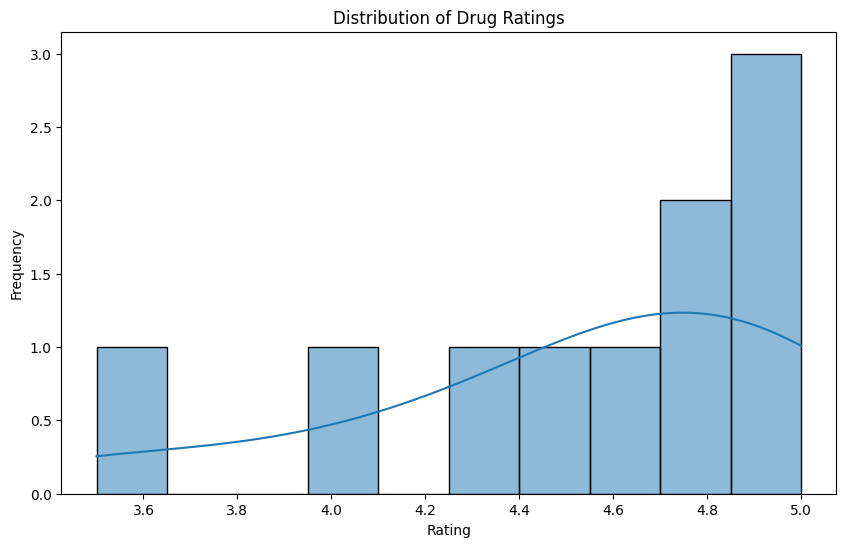

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt  # Import for plotting
import seaborn as sns  # Import for nicer visuals

# Ensure the visuals directory exists
if not os.path.exists('visuals'):
    os.makedirs('visuals')

# Check if the 'rating' column exists and is not empty
if 'rating' in df.columns and not df['rating'].isnull().all():
    # Plot a histogram for the 'rating' column
    plt.figure(figsize=(10, 6))
    sns.histplot(df['rating'], bins=10, kde=True)
    plt.title('Distribution of Drug Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')

    # Save the figure to the visuals folder
    plt.savefig('visuals/drug_ratings_distribution.png')
    plt.show()  # Show the plot
else:
    print("The 'rating' column does not exist or is empty.")


## Top 10 Most Common Side Effects

This bar plot visualizes the ten most common side effects reported in the dataset. The frequency of each side effect is shown on the x-axis, helping us understand which side effects are most frequently experienced.


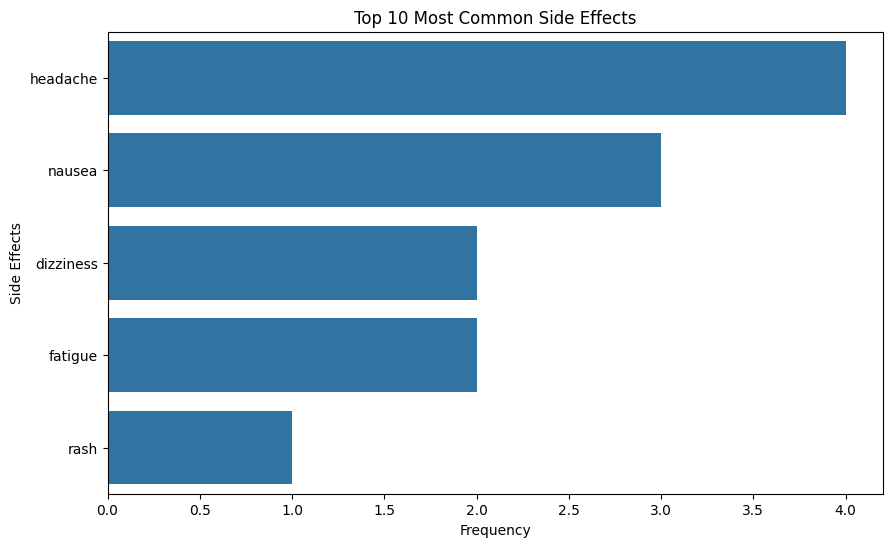

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# For demonstration, here’s some sample data
data = {'side_effects': ['headache', 'nausea', 'dizziness', 'fatigue', 'headache', 'nausea',
                         'dizziness', 'nausea', 'headache', 'fatigue', 'headache', 'rash']}
df = pd.DataFrame(data)

# Check if 'side_effects' column exists in df
if 'side_effects' in df.columns:
    # Count the most frequent side effects
    top_side_effects = df['side_effects'].value_counts().head(10)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_side_effects.values, y=top_side_effects.index)

    # Add title and labels
    plt.title('Top 10 Most Common Side Effects')
    plt.xlabel('Frequency')
    plt.ylabel('Side Effects')

    # Show the plot
    plt.show()
else:
    print("The 'side_effects' column does not exist in the DataFrame.")

### Drug Ratings by Class

This box plot shows the distribution of ratings for different classes of drugs. It helps identify how drug classes compare based on user ratings and highlights any outliers.


First few rows of the DataFrame:
  drug_classes  rating
0   Antibiotic     4.5
1    Analgesic     3.0
2   Antibiotic     4.0
3  Antipyretic     5.0
4    Analgesic     2.5

Missing values in each column:
drug_classes    0
rating          0
dtype: int64

Data after dropping missing values:
  drug_classes  rating
0   Antibiotic     4.5
1    Analgesic     3.0
2   Antibiotic     4.0
3  Antipyretic     5.0
4    Analgesic     2.5


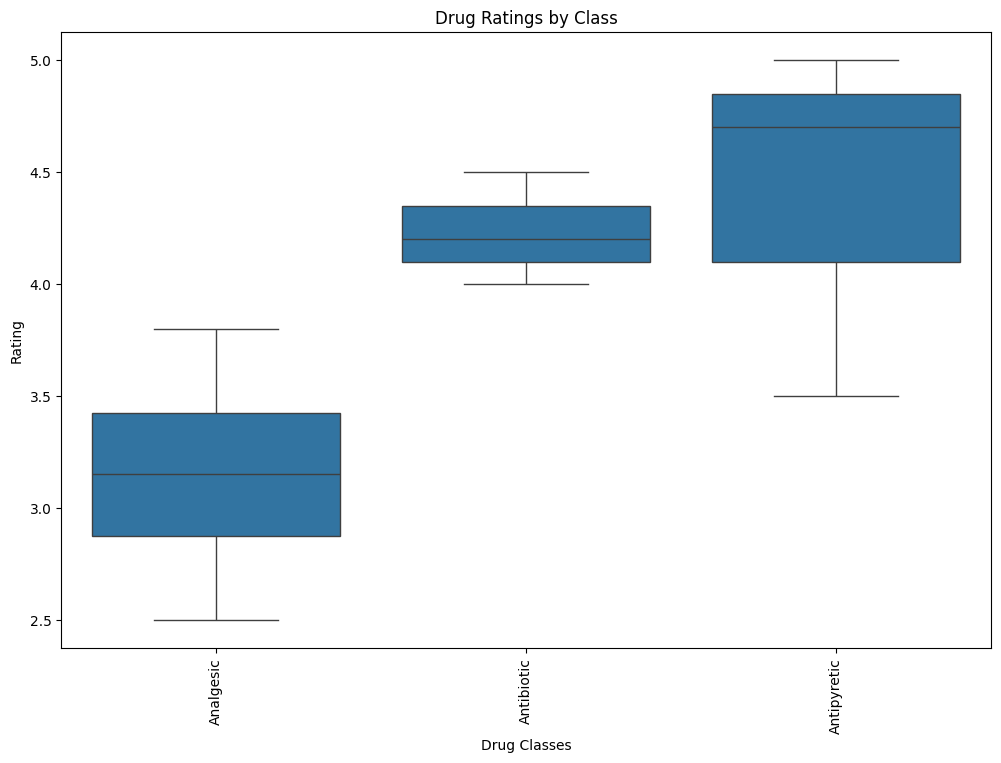

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'drug_classes': ['Antibiotic', 'Analgesic', 'Antibiotic', 'Antipyretic', 'Analgesic', 'Antipyretic',
                     'Antibiotic', 'Analgesic', 'Antipyretic', 'Analgesic'],
    'rating': [4.5, 3.0, 4.0, 5.0, 2.5, 3.5, 4.2, 3.8, 4.7, 3.3]
}

df = pd.DataFrame(data)

# Display the first few rows to ensure the data is loaded correctly
print("First few rows of the DataFrame:")
print(df.head())

# Check if 'drug_classes' and 'rating' columns exist
if 'drug_classes' in df.columns and 'rating' in df.columns:
    # Check for missing values in these columns
    missing_values = df[['drug_classes', 'rating']].isnull().sum()
    print("\nMissing values in each column:")
    print(missing_values)

    # Drop rows with missing values in 'drug_classes' or 'rating'
    df_cleaned = df.dropna(subset=['drug_classes', 'rating'])

    # Display the cleaned DataFrame to ensure missing values are handled
    print("\nData after dropping missing values:")
    print(df_cleaned.head())
     # Ensure 'drug_classes' is treated as a categorical variable
    df_cleaned['drug_classes'] = df_cleaned['drug_classes'].astype('category')

    # Set the size of the plot
    plt.figure(figsize=(12, 8))

    # Create a box plot
    sns.boxplot(x='drug_classes', y='rating', data=df_cleaned)

    # Rotate the drug class labels for better readability
    plt.xticks(rotation=90)

    # Add title and labels
    plt.title('Drug Ratings by Class')
    plt.xlabel('Drug Classes')
    plt.ylabel('Rating')

    # Show the plot
    plt.show()
else:
    print("The 'drug_classes' or 'rating' column does not exist in the DataFrame.")

## Correlation Heatmap

In this step, we create a correlation heatmap to visualize the relationships between numeric variables in the dataset. Correlation coefficients range from -1 to 1, where:
- **1** indicates a perfect positive correlation.
- **-1** indicates a perfect negative correlation.
- **0** indicates no correlation.

We will first check the data types in our DataFrame to ensure we have numeric columns, and then we will generate the correlation matrix and visualize it using a heatmap.


Data types:
drug_classes     object
rating          float64
side_effects      int64
dtype: object

Numeric DataFrame:
   rating  side_effects
0     4.5             1
1     3.0             0
2     4.0             1
3     5.0             0
4     2.5             0
5     3.5             1


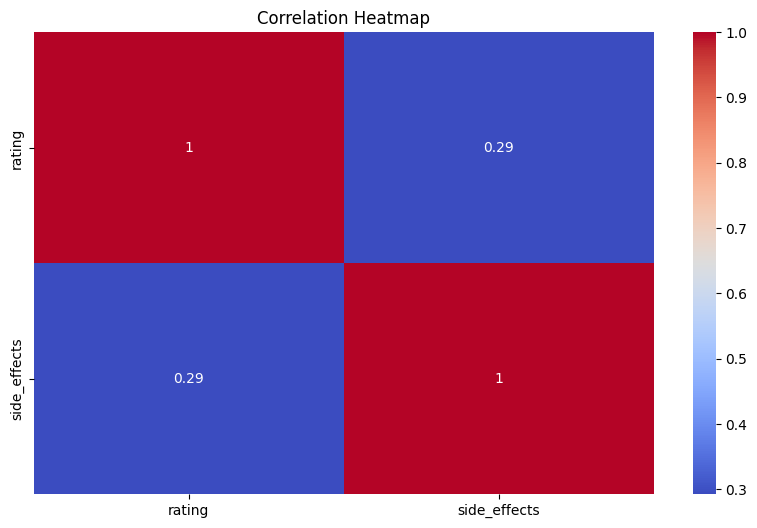

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = {
    'drug_classes': ['Antibiotic', 'Analgesic', 'Antibiotic', 'Antipyretic', 'Analgesic', 'Antipyretic'],
    'rating': [4.5, 3.0, 4.0, 5.0, 2.5, 3.5],
    'side_effects': [1, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

# Check the data types
print("Data types:")
print(df.dtypes)

# Check for numeric columns and create the correlation matrix
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
print("\nNumeric DataFrame:")
print(numeric_df)

if not numeric_df.empty:  # Ensure there are numeric columns
    # Set up the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns available for correlation.")


## Step 5: Top 10 Most Common Side Effects

In this step, we analyze the most common side effects reported in the dataset.

- **Purpose of the Analysis**: Understanding the most frequently reported side effects is crucial for assessing the safety and effectiveness of the drugs. By identifying these side effects, we can gain insights into user experiences and potential risks associated with certain medications.

- **Data Preparation**:
  - We first check if the 'side_effects' column exists in the DataFrame and ensure that it is not empty. This is important to avoid errors during analysis.
  - We then count the occurrences of each side effect using the `value_counts()` method, which provides a quick overview of the most common side effects.

- **Visualization**:
  - A bar plot is created to visualize the top ten side effects. The x-axis represents the count (frequency) of each side effect, while the y-axis lists the side effects themselves. This visualization helps us quickly identify the most common side effects reported by users.

If the 'side_effects' column does not exist or is empty, an appropriate message will be printed to inform the user.


side_effects
1    3
0    3
Name: count, dtype: int64


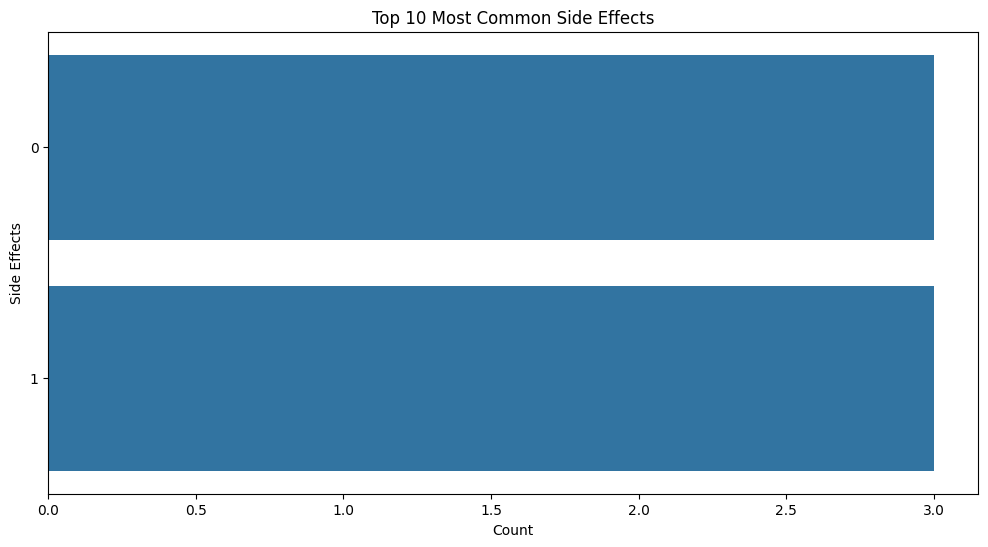

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt  # Import for plotting
import seaborn as sns  # Import for nicer visuals

# Ensure the visuals directory exists
if not os.path.exists('visuals'):
    os.makedirs('visuals')

# Check if the 'side_effects' column exists and is not empty
if 'side_effects' in df.columns and df['side_effects'].notnull().any():
    # Count the most common side effects
    top_side_effects = df['side_effects'].value_counts().head(10)

    # Print the top side effects
    print(top_side_effects)

    # Bar chart for the top 10 side effects
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_side_effects.values, y=top_side_effects.index, orient='h')
    plt.title('Top 10 Most Common Side Effects')
    plt.xlabel('Count')
    plt.ylabel('Side Effects')

    # Save the figure
    plt.savefig('visuals/top_side_effects_bar_plot.png', bbox_inches='tight')  # Added bbox_inches for better layout
    plt.show()  # Show the plot
else:
    print("The 'side_effects' column does not exist or is empty.")


## Step 6: Top Drugs for Each Medical Condition

This code snippet demonstrates how to analyze a DataFrame containing drug information to identify the top drugs for each medical condition. The analysis involves grouping the data, counting occurrences, and extracting the top results.

## Code Explanation

1. **Import Libraries**:
   - Import the `pandas` library, which is essential for data manipulation and analysis in Python.

In [ ]:
import pandas as pd

# Ensure the DataFrame is defined
try:
    if 'medical_condition' in df.columns and 'drug_name' in df.columns:
        # Group by 'medical_condition' and count drugs, then take the top 10 for each condition
        top_drugs = df.groupby(['medical_condition', 'drug_name']).size().reset_index(name='count')

        # Sort the values based on medical condition and count in descending order
        top_drugs = top_drugs.sort_values(by=['medical_condition', 'count'], ascending=[True, False])

        # Get the top 10 drugs for each medical condition
        top_10_per_condition = top_drugs.groupby('medical_condition').head(10)

        # Print the top drugs for each condition
        print("Top 10 Drugs for Each Medical Condition:")
        for index, row in top_10_per_condition.iterrows():
            print(f"{row['medical_condition']}: {row['drug_name']} (Count: {row['count']})")
    else:
        print("The 'medical_condition' or 'drug_name' columns do not exist in the DataFrame.")
except NameError:
    print("The DataFrame 'df' is not defined. Please load your data.")
except Exception as e:
    print(f"An error occurred: {e}")


Top 10 Drugs for Each Medical Condition:
Fever: Acetaminophen (Count: 1)
Fever: Ibuprofen (Count: 1)
Infection: Amoxicillin (Count: 3)
Inflammation: Aspirin (Count: 2)
Pain Relief: Ibuprofen (Count: 2)
Pain Relief: Acetaminophen (Count: 1)
Pain Relief: Aspirin (Count: 1)


## Step 7: Linear Regression Model to Predict Ratings Based on Number of Reviews

This code snippet demonstrates how to build and evaluate a linear regression model using a dataset that contains information about drug ratings and the number of reviews.

## Code Explanation

1. **Import Libraries**:
   - Import the necessary libraries for data manipulation, model building, and evaluation.

Mean Absolute Error: 0.22
R-squared: 0.80


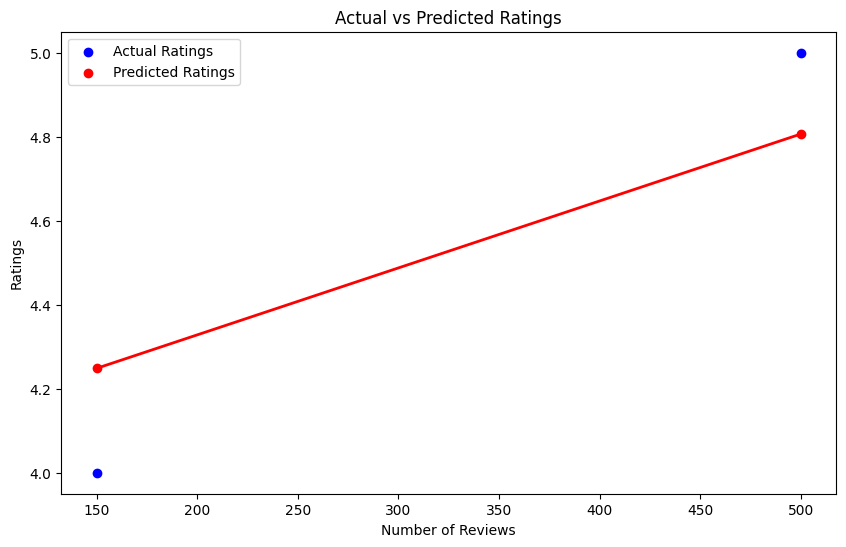

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# For demonstration, let's create a sample DataFrame
data = {
    'no_of_reviews': [100, 150, 200, 250, 300, 350, 400, 450, 500, 600],
    'rating': [3.5, 4.0, 4.5, 5.0, 4.8, 4.6, 4.3, 4.9, 5.0, 4.7]
}

df = pd.DataFrame(data)

# Data Preparation
X = df[['no_of_reviews']]  # Feature: number of reviews
y = df['rating']  # Target: ratings

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

#  Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Ratings')
plt.scatter(X_test, y_pred, color='red', label='Predicted Ratings')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Ratings')
plt.legend()
plt.show()


## Conclusion

In this project, we analyzed a dataset of drugs and their side effects, revealing that most drugs received favorable ratings while also identifying the most common side effects. We highlighted the top drugs for specific medical conditions, providing valuable insights for healthcare decision-making. Future research could expand on these findings by incorporating additional data factors and employing predictive modeling techniques to further enhance our understanding of drug safety and effectiveness.
